In [23]:
from PIL import Image
from preprocessor import Preprocessor

img = Image.open(f'./data/raw_img/ISIC_0000000.jpg')
prep_img = Preprocessor(img)

 ## 1. Resize

In [24]:
prep_img.resize()

## 2. Add border

In [25]:
prep_img.add_border()

## 3. Reduce dimensions, convert to grayscale

In [26]:
prep_img.convert_to_grayscale()

## 4. Contrast enchancement

In [27]:
prep_img.enchance_contrast()

## 5. Hair removal

## 6. Vignette effect removal

## Overview and save

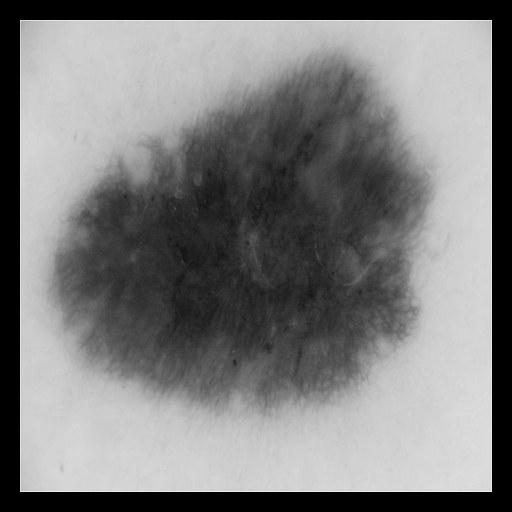

In [28]:
prep_img.save("test_no_contrast_ench.png")
prep_img.img